# <h1><center>KBB Used vs New Car Cost Analysis</center></h1>

## Introduction

As the state of the economy and car market changes, the price of automobiles varies with lots of uncertainty. As someone who is curious how much my current car is worth and how much I can expect to pay for a car at this moment, this project reveals current prices and trends of the new and used car market. A cost analysis is accomplished by web scraping data from Kelly Blue Book, a service that posts new and used vehicles listed by owner and dealer for sale.

## Table of Contents:
* [Extracting Data](#first-bullet1)
* [Cleaning Data](#second-bullet1)
* [Visualization and Analysis](#third-bullet1)

## Extracting Data <a class="anchor" id="first-bullet1"></a>

In [27]:
# Import relevant libraries

from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
import time
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
s = Service(ChromeDriverManager().install())

from bs4 import BeautifulSoup as bs
import requests

In [29]:
# Running the Chrome webdriver via Selenium
driver = webdriver.Chrome(service=s)

# Accessing Kelly Blue Book's most recent posts in the Austin, TX area
driver.get('https://www.kbb.com/cars-for-sale/austin-tx-73301?dma=&listingTypes=NEW%2CUSED&searchRadius=75&location=&marketExtension=include&isNewSearch=false&showAccelerateBanner=false&sortBy=datelistedDESC&numRecords=25')

time.sleep (3)

# From the webpage, pulling the html and saving it
html = driver.page_source
driver.quit()

In [30]:
html

'<html lang="en"><head><meta charset="utf-8"><meta http-equiv="X-UA-Compatible" content="IE=edge"><meta name="viewport" content="width=device-width, initial-scale=1"><title>Cars for Sale in Austin, TX (Test Drive at Home) - Kelley Blue Book</title><meta data-rh="true" name="description" content="Shop, watch video walkarounds and compare prices on Cars listings in Austin, TX. See Kelley Blue Book pricing to get the best deal. Search from 47930 cars for sale, including a New 2023 Audi RS Q8, a New 2023 Cadillac Escalade Sport, and a New 2023 Cadillac Escalade V ranging in price from $800 to $850,000."><meta data-rh="true" name="p:domain_verify" content="315d28475397cff9ca9875c3d437ee5b"><meta data-rh="true" name="referrer" content="unsafe-url"><meta data-rh="true" property="fb:app_id" content="184365531583362"><meta data-rh="true" property="og:title" content="Cars for Sale in Austin, TX (Test Drive at Home) - Kelley Blue Book"><meta data-rh="true" property="og:type" content="product"><me

In [34]:
# Using Beautiful Soup, the html is parsed
soup = bs(html)

# Pulling the title of each post
title = soup.find_all("h3", {"class": "text-bold text-size-400 text-size-sm-500 link-unstyled"})
title_clean = []
for a in title:
    title_clean.append(a.get_text())
print(len(title))

# Pulling the price of each car
price = soup.find_all("span", {"class": "first-price"})
price_clean = []
for a in price:
    price_clean.append(a.get_text())
print(len(price))

# Pulling the mileage of each car. For new cars, the mileage is not posted because it is zero. This is why the length of the mileage list is less than the title and price lists.
mileage = soup.find_all("ul", {"class": "list list-inline display-inline margin-bottom-0 pipe-delimited text-gray text-size-300"})
mileage_clean = []
for a in mileage:
    mileage_clean.append(a.get_text())
print(len(mileage))

29
29
12


## Cleaning Data  <a class="anchor" id="second-bullet1"></a>

In [35]:
# putting into pandas df
import pandas as pd
df = pd.DataFrame(list(zip(title_clean,price_clean)),columns=['title','price'])
df

,title,price
0,Used 2003 Nissan Xterra XE w/ Power Pkg,"7,888"
1,Certified 2021 Cadillac CT5 Premium Luxury,"40,900"
2,New 2023 Cadillac XT5 Luxury,"40,465"
3,Used 2015 Lamborghini Aventador LP 700-4,"302,995"
4,New 2023 Cadillac Escalade V,"212,185"
5,New 2023 Audi RS Q8,"161,085MSRP"
6,New 2023 Mercedes-Benz G 550,"154,300"
7,Used 2021 Porsche 911 Carrera S,"143,949"
8,Used 2021 Volkswagen Tiguan S,"26,338"
9,Used 2023 Porsche Cayenne GTS,"140,000"


In [36]:
# Cleaning the data
new_used_or_certified = []
year = []
for a in df['title']:
    new_used_or_certified.append(a.split()[0]) # Taking out the year from each title
    year.append(a.split()[1]) # Taking out whether the car is new or used from each title
for i, a in enumerate(df['price']):
    if a[-4:] == 'MSRP':
        df['price'].iloc[i] = a[:-4] # Removing 'MSPR' from the prices that contain the letters
df['new_used_or_certified'] = new_used_or_certified
df['year'] = year

In [37]:
# Adding a column for vehicle mileage. Only used vehicles have mileage

# The webscraper pulls in a shortened list of vehicle mileage because only a fraction of the listed vehicles are used.
mileage_extra_rows = [0]*(len(df.title)-len(mileage_clean)) # Extending the length of the mileage list to match the rest of the dataframe.
for a in mileage_extra_rows:
    mileage_clean.append(0)

mileage_all = []

# Looping through the list of new and used vehicles and assigning the mileage.
for a,b in zip(df['new_used_or_certified'],mileage_clean): 
    if a == 'Used':
        mileage_all.append(b)
    else:
        mileage_all.append(0)

df['mileage'] = mileage_all

df.head() # Preview the dataframe

,title,price,new_used_or_certified,year,mileage
0,Used 2003 Nissan Xterra XE w/ Power Pkg,"7,888",Used,2003,"19,727 miles"
1,Certified 2021 Cadillac CT5 Premium Luxury,"40,900",Certified,2021,0
2,New 2023 Cadillac XT5 Luxury,"40,465",New,2023,0
3,Used 2015 Lamborghini Aventador LP 700-4,"302,995",Used,2015,"11,991 miles"
4,New 2023 Cadillac Escalade V,"212,185",New,2023,0


In [38]:
# Importing a list of automobile manufacturers from Wikipedia
url = "https://en.wikipedia.org/wiki/List_of_current_automobile_manufacturers_by_country"
data = requests.get(url).text
soup = bs(data, 'html.parser')
makes = soup.find_all("a")
car_makes = []
for a in makes:
    if (len(str(a.text))<2):
        pass
    else:
        car_makes.append(a.text)

# Assigning manufacturer names based on posttitle
testindex = []
test = []

for i,a in enumerate(df['title']):
    for b in a.split():
        for c in car_makes:
            for d in c.split():
                if d == 'New':
                    pass
                elif d == b:
                    testindex.append(i)
                    test.append(d)
                else:
                    pass
# Creating a dataframe for the car manufacturer names and                 
d = {'index':testindex,'car_make':test}
dfcm = pd.DataFrame(data=d)
dfcm['car_make'] = dfcm['car_make'].replace('Abarth','Fiat')
dfcm['car_make'] = dfcm['car_make'].replace('Land','Land Rover')
dfcm = dfcm.drop_duplicates()
dfcm = dfcm.set_index('index') # Changing the index of the manufacturer df so the join is by index
df = df.join(dfcm)
df.head()

,title,price,new_used_or_certified,year,mileage,car_make
0,Used 2003 Nissan Xterra XE w/ Power Pkg,"7,888",Used,2003,"19,727 miles",Nissan
1,Certified 2021 Cadillac CT5 Premium Luxury,"40,900",Certified,2021,0,Cadillac
2,New 2023 Cadillac XT5 Luxury,"40,465",New,2023,0,Cadillac
3,Used 2015 Lamborghini Aventador LP 700-4,"302,995",Used,2015,"11,991 miles",Lamborghini
4,New 2023 Cadillac Escalade V,"212,185",New,2023,0,Cadillac


In [39]:
# Exporting to a csv
import datetime
date_today = [datetime.date.today()]*len(df)
df['date_post'] = date_today
    
df.to_csv('KBB Web Scraping Data.csv', mode='a', index=False, header=False)
df = pd.read_csv(r'C:\Users\ngret\DataPortfolio\Data-Analytics-Portfolio\Used vs New Car Cost Analysis\KBB Web Scraping Data.csv') # Bring full historical csv back in as df

In [40]:
df_new = df[df['new_used_or_certified']=='New']
df_used = df[df['new_used_or_certified']=='Used']

df_min_cost = df[['car_make','cost','year']].groupby('car_make').agg('min').sort_values(by='cost',ascending=False)
df_max_cost = df[['car_make','cost','year']].groupby('car_make').agg('max').sort_values(by='cost',ascending=False)

In [90]:
df

,title,cost,new_used_or_certified,year,mileage,car_make,scrape_date
0,Used 2008 Nissan Xterra S,9088,Used,2008,"31,953 miles",NaN,11/9/2022
1,Used 2018 Ford Explorer XLT,28995,Used,2018,89 miles,NaN,11/9/2022
2,New 2022 Chevrolet Silverado 1500 Custom,42620,New,2022,0,NaN,11/9/2022
3,New 2022 GMC Sierra 1500 Elevation,299900,New,2022,0,NaN,11/9/2022
4,Used 2022 Porsche 911 GT3,230000,Used,2022,10 miles,NaN,11/9/2022
...,...,...,...,...,...,...,...
353,Used 2022 Cadillac CT5 V Blackwing,"109,888",Used,2022,0,Cadillac,2023-06-15
354,New 2024 GMC Sierra 2500 Denali,"108,485",New,2024,0,GMC,2023-06-15
355,Used 2023 RAM 1500 TRX,"106,991",Used,2023,0,NaN,2023-06-15
356,New 2024 GMC Sierra 2500 AT4,"105,985",New,2024,0,GMC,2023-06-15


In [91]:
listed_price = []

for a in df['cost']:
    listed_price.append(int(a.replace(',','')))

[9088,
 28995,
 42620,
 299900,
 230000,
 189891,
 175000,
 12975,
 140705,
 129756,
 124000,
 123449,
 122070,
 120710,
 103640,
 101805,
 99971,
 95115,
 94820,
 91777,
 91545,
 90855,
 90405,
 90385,
 89785,
 89765,
 89600,
 89155,
 12498,
 72491,
 40703,
 299900,
 230000,
 189891,
 175000,
 40700,
 140705,
 129756,
 124000,
 123449,
 122070,
 120710,
 103640,
 101805,
 99971,
 95115,
 94820,
 91777,
 91545,
 90855,
 90405,
 90385,
 89785,
 89765,
 89600,
 89155,
 12055,
 34995,
 43988,
 305000,
 224941,
 169982,
 151145,
 140000,
 29883,
 120710,
 115395,
 114982,
 112565,
 110800,
 105780,
 103941,
 102370,
 102230,
 99710,
 95025,
 93095,
 92910,
 92195,
 89765,
 89475,
 88980,
 88295,
 88145,
 87680,
 11088,
 29488,
 31452,
 124980,
 96195,
 95195,
 92185,
 91988,
 23656,
 91595,
 89775,
 89245,
 88720,
 88145,
 88145,
 86857,
 84770,
 84390,
 79605,
 79510,
 76000,
 74645,
 74055,
 73995,
 72432,
 71735,
 70945,
 70855,
 69730,
 14707,
 23838,
 41980,
 155358,
 106980,
 101595,

## Visualization  <a class="anchor" id="second-bullet1"></a>

Text(0, 0.5, 'Listed Price')

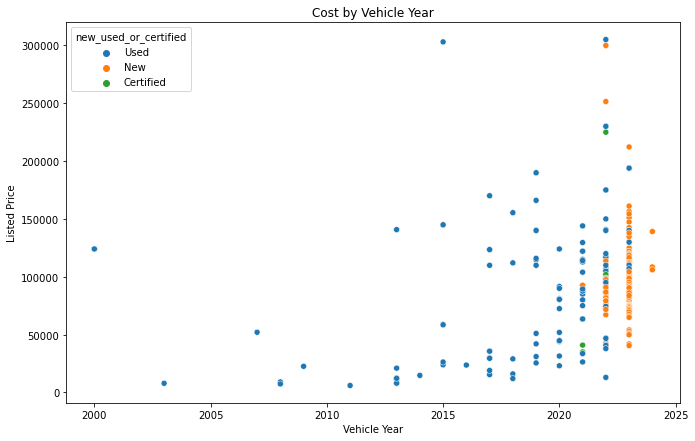

In [103]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

a4_dims = (11, 7)
fig, ax = plt.subplots(figsize=a4_dims)
sns.scatterplot(ax=ax, data=df, x="year", y="listed_price", hue="new_used_or_certified")
plt.title('Cost by Vehicle Year')
plt.xlabel('Vehicle Year')
plt.ylabel('Listed Price')

Text(0, 0.5, 'Listed Price')

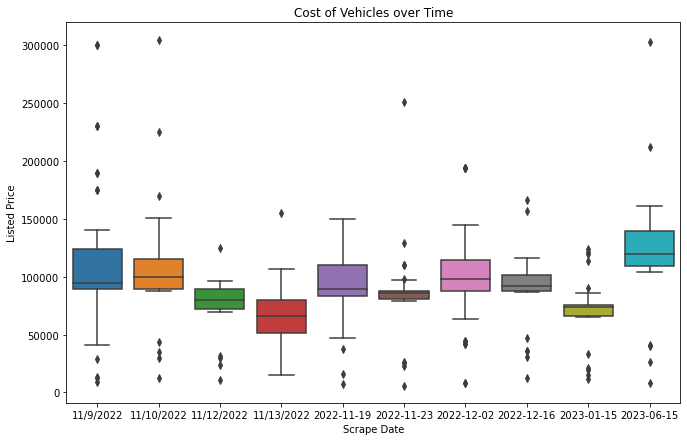

In [108]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

a4_dims = (11, 7)
fig, ax = plt.subplots(figsize=a4_dims)
sns.boxplot(ax=ax, data=df, x="scrape_date", y="listed_price")
plt.title('Cost of Vehicles over Time')
plt.xlabel('Scrape Date')
plt.ylabel('Listed Price')